In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.metrics import classification_report

In [6]:
mn=tf.keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test)=mn.load_data()

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32') 

In [9]:
X_train[0].shape

(28, 28)

In [10]:
re=784
X_train=X_train.reshape(60000,re) 
X_test =X_test.reshape(10000,re) 

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
Y_train=tf.keras.utils.to_categorical(Y_train,10) 

In [13]:
#SGD

In [14]:
model1=tf.keras.Sequential([
      tf.keras.layers.Dense(20,input_shape=(784,),activation="relu"),
      tf.keras.layers.Dense(40,activation="relu"),
      tf.keras.layers.Dense(10,activation="softmax")
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
_________________________________________________________________


In [15]:
model1.compile(optimizer="sgd",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model1=model1.fit(X_train,Y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.8915 - accuracy: 0.7585 - val_loss: 0.3854 - val_accuracy: 0.8913
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3655 - accuracy: 0.8964 - val_loss: 0.3045 - val_accuracy: 0.9136
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3119 - accuracy: 0.9105 - val_loss: 0.2792 - val_accuracy: 0.9212
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2831 - accuracy: 0.9179 - val_loss: 0.2558 - val_accuracy: 0.9283
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2609 - accuracy: 0.9250 - val_loss: 0.2479 - val_accuracy: 0.9302
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2429 - accuracy: 0.9304 - val_loss: 0.2257 - val_accuracy: 0.9369
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2272 - accuracy: 0.9348 - val_loss: 0.2157 - val_accuracy:

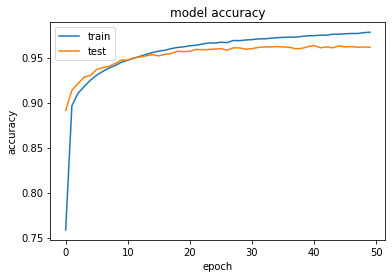

In [16]:
plt.plot(trained_model1.history['accuracy'])
plt.plot(trained_model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

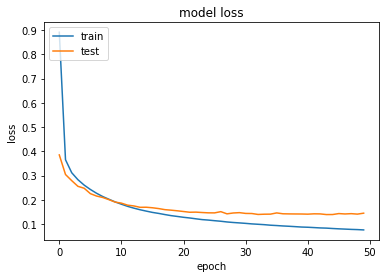

In [17]:
plt.plot(trained_model1.history['loss'])
plt.plot(trained_model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [18]:
Y_pred1=model1.predict(X_test)
Y_pred1=Y_pred1.argmax(axis=1)
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.97      1032
           3       0.94      0.97      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.99      0.92      0.95       892
           6       0.96      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.96      0.94      0.95       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [19]:
#mini batch

In [20]:
model2=tf.keras.Sequential([
      tf.keras.layers.Dense(20,input_shape=(784,),activation="relu"),
      tf.keras.layers.Dense(40,activation="relu"),
      tf.keras.layers.Dense(10,activation="softmax")
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_4 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                410       
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
_________________________________________________________________


In [21]:
model2.compile(optimizer="sgd",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model2=model2.fit(X_train,Y_train,batch_size=64,epochs=50,validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 4s 5ms/step - loss: 1.2247 - accuracy: 0.6620 - val_loss: 0.5383 - val_accuracy: 0.8576
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.4654 - accuracy: 0.8728 - val_loss: 0.3753 - val_accuracy: 0.8963
Epoch 3/50
750/750 [==============================] - 3s 5ms/step - loss: 0.3722 - accuracy: 0.8948 - val_loss: 0.3266 - val_accuracy: 0.9082
Epoch 4/50
750/750 [==============================] - 3s 5ms/step - loss: 0.3320 - accuracy: 0.9048 - val_loss: 0.3002 - val_accuracy: 0.9137
Epoch 5/50
750/750 [==============================] - 4s 5ms/step - loss: 0.3067 - accuracy: 0.9122 - val_loss: 0.2830 - val_accuracy: 0.9180
Epoch 6/50
750/750 [==============================] - 3s 5ms/step - loss: 0.2881 - accuracy: 0.9170 - val_loss: 0.2667 - val_accuracy: 0.9225
Epoch 7/50
750/750 [==============================] - 4s 5ms/step - loss: 0.2731 - accuracy: 0.9214 - val_loss: 0.2560 - val_accuracy: 0.9253
Epoch 

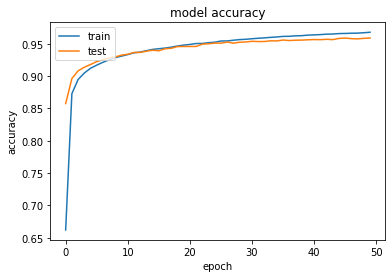

In [22]:
plt.plot(trained_model2.history['accuracy'])
plt.plot(trained_model2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

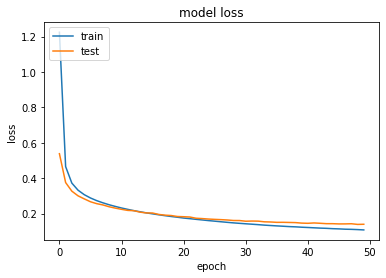

In [23]:
plt.plot(trained_model2.history['loss'])
plt.plot(trained_model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [24]:
Y_pred2=model2.predict(X_test)
Y_pred2=Y_pred2.argmax(axis=1)
print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.95      0.97      0.96       982
           5       0.95      0.94      0.94       892
           6       0.97      0.96      0.96       958
           7       0.96      0.97      0.96      1028
           8       0.95      0.94      0.95       974
           9       0.97      0.92      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [25]:
#adam

In [26]:
model3=tf.keras.Sequential([
      tf.keras.layers.Dense(20,input_shape=(784,),activation="relu"),
      tf.keras.layers.Dense(40,activation="relu"),
      tf.keras.layers.Dense(10,activation="softmax")
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_7 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                410       
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
_________________________________________________________________


In [27]:
model3.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model3=model3.fit(X_train,Y_train,batch_size=64,epochs=50,validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 5s 6ms/step - loss: 0.5186 - accuracy: 0.8523 - val_loss: 0.2636 - val_accuracy: 0.9216
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.2445 - accuracy: 0.9303 - val_loss: 0.2066 - val_accuracy: 0.9413
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 0.2001 - accuracy: 0.9433 - val_loss: 0.1874 - val_accuracy: 0.9463
Epoch 4/50
750/750 [==============================] - 4s 5ms/step - loss: 0.1753 - accuracy: 0.9494 - val_loss: 0.1777 - val_accuracy: 0.9480
Epoch 5/50
750/750 [==============================] - 4s 5ms/step - loss: 0.1578 - accuracy: 0.9538 - val_loss: 0.1598 - val_accuracy: 0.9540
Epoch 6/50
750/750 [==============================] - 4s 5ms/step - loss: 0.1431 - accuracy: 0.9582 - val_loss: 0.1645 - val_accuracy: 0.9517
Epoch 7/50
750/750 [==============================] - 4s 5ms/step - loss: 0.1320 - accuracy: 0.9609 - val_loss: 0.1604 - val_accuracy: 0.9528
Epoch 

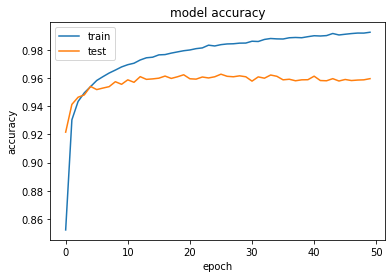

In [28]:
plt.plot(trained_model3.history['accuracy'])
plt.plot(trained_model3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

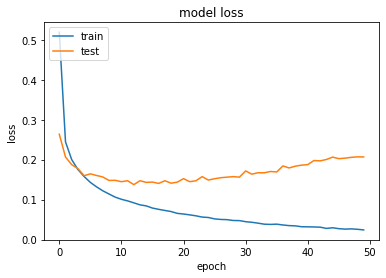

In [29]:
plt.plot(trained_model3.history['loss'])
plt.plot(trained_model3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
Y_pred3=model3.predict(X_test)
Y_pred3=Y_pred3.argmax(axis=1)
print(classification_report(Y_test,Y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.94      0.95      0.95      1010
           4       0.96      0.97      0.97       982
           5       0.94      0.97      0.95       892
           6       0.97      0.96      0.97       958
           7       0.96      0.95      0.96      1028
           8       0.96      0.94      0.95       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [31]:
#multiple neuron

In [32]:
model4=tf.keras.Sequential([
      tf.keras.layers.Dense(50,input_shape=(784,),activation="relu"),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(10,activation="softmax")
])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________


In [33]:
model4.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model4=model4.fit(X_train,Y_train,batch_size=64,epochs=50,validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3576 - accuracy: 0.8965 - val_loss: 0.1734 - val_accuracy: 0.9519
Epoch 2/50
750/750 [==============================] - 7s 9ms/step - loss: 0.1576 - accuracy: 0.9533 - val_loss: 0.1350 - val_accuracy: 0.9619
Epoch 3/50
750/750 [==============================] - 7s 9ms/step - loss: 0.1167 - accuracy: 0.9653 - val_loss: 0.1249 - val_accuracy: 0.9625
Epoch 4/50
750/750 [==============================] - 6s 9ms/step - loss: 0.0936 - accuracy: 0.9711 - val_loss: 0.1093 - val_accuracy: 0.9682
Epoch 5/50
750/750 [==============================] - 5s 7ms/step - loss: 0.0795 - accuracy: 0.9754 - val_loss: 0.1147 - val_accuracy: 0.9660
Epoch 6/50
750/750 [==============================] - 6s 8ms/step - loss: 0.0684 - accuracy: 0.9792 - val_loss: 0.1066 - val_accuracy: 0.9683
Epoch 7/50
750/750 [==============================] - 6s 8ms/step - loss: 0.0606 - accuracy: 0.9806 - val_loss: 0.1171 - val_accuracy: 0.9644
Epoch 

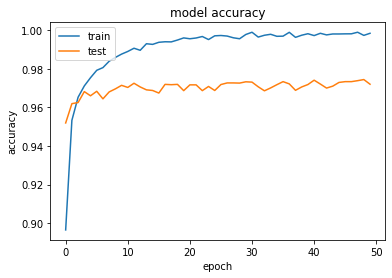

In [34]:
plt.plot(trained_model4.history['accuracy'])
plt.plot(trained_model4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

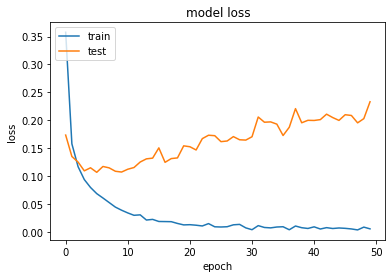

In [35]:
plt.plot(trained_model4.history['loss'])
plt.plot(trained_model4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
Y_pred4=model4.predict(X_test)
Y_pred4=Y_pred4.argmax(axis=1)
print(classification_report(Y_test,Y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.92      0.95      1028
           8       0.96      0.98      0.97       974
           9       0.93      0.98      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [37]:
#RMS PROP

In [38]:
model5=tf.keras.Sequential([
       tf.keras.layers.Dense(20,input_shape=(784,),activation="relu"),
       tf.keras.layers.Dense(40,activation="relu"),
       tf.keras.layers.Dense(10,activation="softmax")
])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_13 (Dense)             (None, 40)                840       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                410       
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
_________________________________________________________________


In [39]:
model5.compile(optimizer="rmsprop",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model5=model5.fit(X_train,Y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4106 - accuracy: 0.8836 - val_loss: 0.2297 - val_accuracy: 0.9334
Epoch 2/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2186 - accuracy: 0.9363 - val_loss: 0.1937 - val_accuracy: 0.9436
Epoch 3/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1803 - accuracy: 0.9474 - val_loss: 0.1688 - val_accuracy: 0.9520
Epoch 4/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1568 - accuracy: 0.9541 - val_loss: 0.1633 - val_accuracy: 0.9546
Epoch 5/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1408 - accuracy: 0.9592 - val_loss: 0.1613 - val_accuracy: 0.9542
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1314 - accuracy: 0.9609 - val_loss: 0.1499 - val_accuracy: 0.9590
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1215 - accuracy: 0.9645 - val_loss: 0.1596 - val_accura

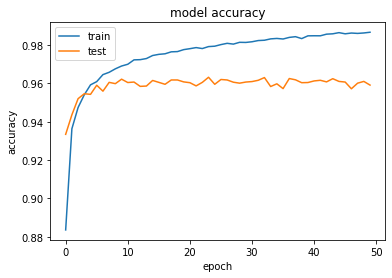

In [40]:
plt.plot(trained_model5.history['accuracy'])
plt.plot(trained_model5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

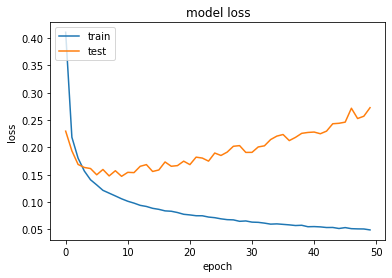

In [41]:
plt.plot(trained_model5.history['loss'])
plt.plot(trained_model5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
Y_pred5=model5.predict(X_test)
Y_pred5=Y_pred5.argmax(axis=1)
print(classification_report(Y_test,Y_pred5))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.95      0.95      1032
           3       0.94      0.94      0.94      1010
           4       0.94      0.97      0.96       982
           5       0.91      0.97      0.94       892
           6       0.98      0.97      0.97       958
           7       0.96      0.95      0.96      1028
           8       0.96      0.92      0.94       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [43]:
#regularization

In [44]:
model6=tf.keras.Sequential([
       tf.keras.layers.Dense(20,input_shape=(784,),activation="relu"),
       tf.keras.layers.Dense(40,activation="relu"),
       tf.keras.layers.Dropout(0.2),
       tf.keras.layers.Dense(10,activation="softmax")
])
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_16 (Dense)             (None, 40)                840       
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                410       
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
_________________________________________________________________


In [45]:
model6.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model6=model6.fit(X_train,Y_train,batch_size=64,epochs=50,validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 6s 9ms/step - loss: 0.6139 - accuracy: 0.8168 - val_loss: 0.2629 - val_accuracy: 0.9245
Epoch 2/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3034 - accuracy: 0.9111 - val_loss: 0.2011 - val_accuracy: 0.9401
Epoch 3/50
750/750 [==============================] - 6s 8ms/step - loss: 0.2447 - accuracy: 0.9297 - val_loss: 0.1811 - val_accuracy: 0.9445
Epoch 4/50
750/750 [==============================] - 6s 8ms/step - loss: 0.2134 - accuracy: 0.9372 - val_loss: 0.1644 - val_accuracy: 0.9520
Epoch 5/50
750/750 [==============================] - 6s 8ms/step - loss: 0.1926 - accuracy: 0.9440 - val_loss: 0.1565 - val_accuracy: 0.9541
Epoch 6/50
750/750 [==============================] - 6s 8ms/step - loss: 0.1780 - accuracy: 0.9469 - val_loss: 0.1501 - val_accuracy: 0.9556
Epoch 7/50
750/750 [==============================] - 6s 8ms/step - loss: 0.1666 - accuracy: 0.9505 - val_loss: 0.1458 - val_accuracy: 0.9572
Epoch 

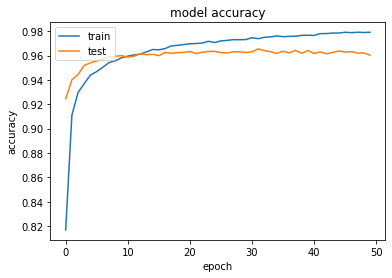

In [46]:
plt.plot(trained_model6.history['accuracy'])
plt.plot(trained_model6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

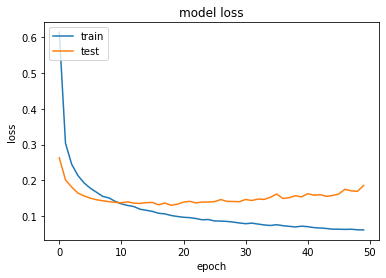

In [47]:
plt.plot(trained_model6.history['loss'])
plt.plot(trained_model6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
Y_pred6=model6.predict(X_test)
Y_pred6=Y_pred6.argmax(axis=1)
print(classification_report(Y_test,Y_pred6))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.93      0.95      1032
           3       0.92      0.97      0.95      1010
           4       0.96      0.95      0.96       982
           5       0.96      0.96      0.96       892
           6       0.96      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.94      0.95       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [49]:
#ada graad

In [50]:
model7=tf.keras.Sequential([
       tf.keras.layers.Dense(20,input_shape=(784,),activation="relu"),
       tf.keras.layers.Dense(40,activation="relu"),
       tf.keras.layers.Dense(10,activation="softmax")
])
model7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_19 (Dense)             (None, 40)                840       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                410       
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
_________________________________________________________________


In [51]:
model7.compile(optimizer="adagrad",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model7=model7.fit(X_train,Y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 7s 5ms/step - loss: 1.9319 - accuracy: 0.3553 - val_loss: 1.5305 - val_accuracy: 0.6113
Epoch 2/50
1500/1500 [==============================] - 10s 6ms/step - loss: 1.2937 - accuracy: 0.6845 - val_loss: 1.0582 - val_accuracy: 0.7623
Epoch 3/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.9568 - accuracy: 0.7724 - val_loss: 0.8182 - val_accuracy: 0.8133
Epoch 4/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.7823 - accuracy: 0.8063 - val_loss: 0.6894 - val_accuracy: 0.8375
Epoch 5/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.6828 - accuracy: 0.8261 - val_loss: 0.6120 - val_accuracy: 0.8539
Epoch 6/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6190 - accuracy: 0.8408 - val_loss: 0.5599 - val_accuracy: 0.8627
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5741 - accuracy: 0.8508 - val_loss: 0.5225 - val_accuracy

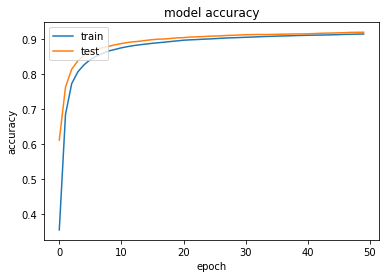

In [52]:
plt.plot(trained_model7.history['accuracy'])
plt.plot(trained_model7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

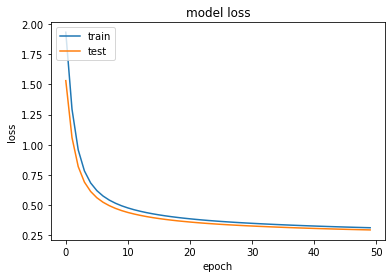

In [53]:
plt.plot(trained_model7.history['loss'])
plt.plot(trained_model7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [54]:
Y_pred7=model7.predict(X_test)
Y_pred7=Y_pred7.argmax(axis=1)
print(classification_report(Y_test,Y_pred7))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.88      0.90      1032
           3       0.90      0.90      0.90      1010
           4       0.90      0.93      0.91       982
           5       0.91      0.87      0.89       892
           6       0.92      0.94      0.93       958
           7       0.92      0.91      0.92      1028
           8       0.87      0.88      0.88       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.92      0.92      0.92     10000



In [55]:
#MANIPULATE epochs and batch_size

In [56]:
model8=tf.keras.Sequential([
       tf.keras.layers.Dense(20,input_shape=(784,),activation="relu"),
       tf.keras.layers.Dense(40,activation="relu"),
       tf.keras.layers.Dense(10,activation="softmax")
])
model8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_22 (Dense)             (None, 40)                840       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                410       
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
_________________________________________________________________


In [57]:
model8.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model8=model8.fit(X_train,Y_train,batch_size=32,epochs=30,validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4224 - accuracy: 0.8786 - val_loss: 0.2454 - val_accuracy: 0.9286
Epoch 2/30
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2228 - accuracy: 0.9341 - val_loss: 0.1893 - val_accuracy: 0.9466
Epoch 3/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1807 - accuracy: 0.9457 - val_loss: 0.1875 - val_accuracy: 0.9452
Epoch 4/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1566 - accuracy: 0.9527 - val_loss: 0.1719 - val_accuracy: 0.9484
Epoch 5/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1418 - accuracy: 0.9566 - val_loss: 0.1465 - val_accuracy: 0.9564
Epoch 6/30
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1256 - accuracy: 0.9619 - val_loss: 0.1435 - val_accuracy: 0.9573
Epoch 7/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1157 - accuracy: 0.9649 - val_loss: 0.1392 - val_accura

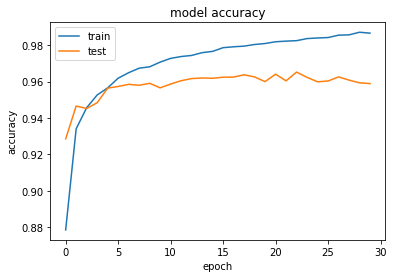

In [58]:
plt.plot(trained_model8.history['accuracy'])
plt.plot(trained_model8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

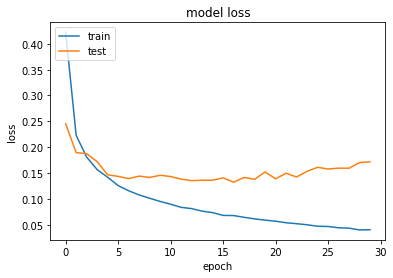

In [59]:
plt.plot(trained_model8.history['loss'])
plt.plot(trained_model8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [60]:
Y_pred8=model8.predict(X_test)
Y_pred8=Y_pred8.argmax(axis=1)
print(classification_report(Y_test,Y_pred8))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.95      0.94      0.95      1010
           4       0.97      0.96      0.96       982
           5       0.97      0.92      0.94       892
           6       0.96      0.98      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.91      0.97      0.94       974
           9       0.98      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

